# Import

In [4]:
import numpy as np
from preprocessing import Preprocessing
import matplotlib.pyplot as plt

# Data

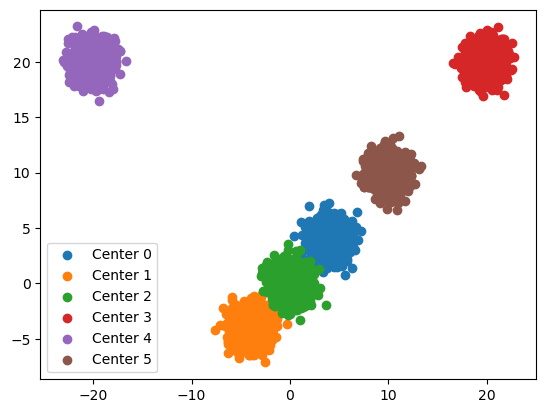

In [17]:
N = 1000
CENTERS = [[2, 2], [-2, -2], [0, 0], [10, 10], [-10, 10], [5, 5]]
DATA = np.concatenate([np.random.multivariate_normal(center, np.eye(2), size=N) + center for center in CENTERS], axis=0)

for idx_center, center in enumerate(CENTERS):
    plt.scatter(DATA[idx_center * N:(idx_center + 1) * N, 0], DATA[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
plt.legend()
plt.show()

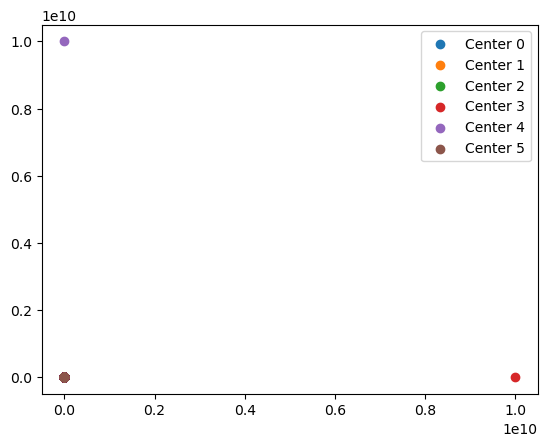

In [18]:
extreme_data = Preprocessing.transform_to_extreme_values(DATA)

for idx_center, center in enumerate(CENTERS):
    plt.scatter(extreme_data[idx_center * N:(idx_center + 1) * N, 0], extreme_data[idx_center * N:(idx_center + 1) * N, 1], label=f'Center {idx_center}')
plt.legend()
plt.show()

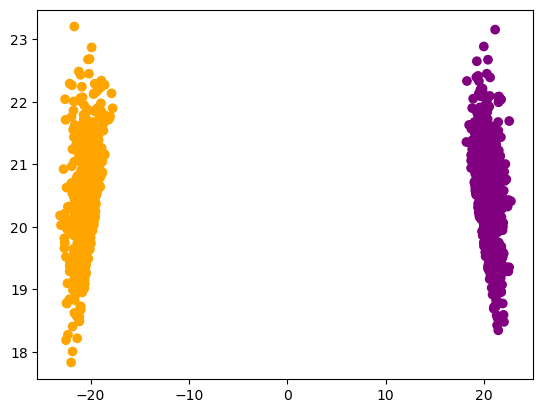

In [22]:
largest_data = Preprocessing.filter_largest(DATA, 0.2)

plt.scatter(largest_data[:, 0], largest_data[:, 1], color=np.where(largest_data[:, 0]<0, "orange", "purple"))

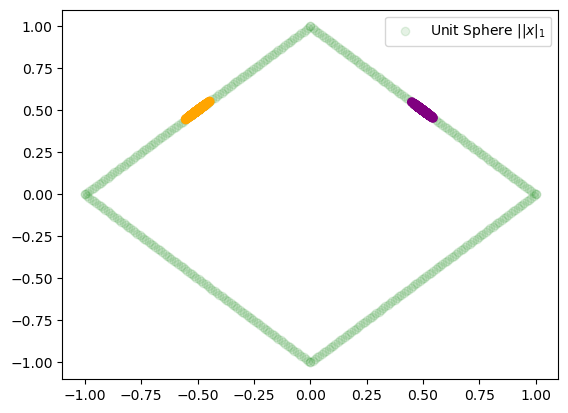

In [42]:
sphere_data = Preprocessing.project_onto_unit_sphere(largest_data)


plt.scatter(np.linspace(0, 1, 100), 1 - np.linspace(0, 1, 100), color="green", alpha=0.1)
plt.scatter(np.linspace(0, 1, 100), -(1 - np.linspace(0, 1, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), 1 - abs(np.linspace(-1, 0, 100)), color="green", alpha=0.1)
plt.scatter(np.linspace(-1, 0, 100), -(1 - abs(np.linspace(-1, 0, 100))), color="green", alpha=0.1, label = rf"Unit Sphere $ \|| x \||_1$")
plt.scatter(sphere_data[:, 0], sphere_data[:, 1], color=np.where(largest_data[:, 0]<0, "orange", "purple"))
plt.legend()
plt.show()

In [26]:
sphere_data

array([[ 0.52638332,  0.47361668],
       [ 0.46205151,  0.53794849],
       [ 0.49448142,  0.50551858],
       ...,
       [-0.50877752,  0.49122248],
       [-0.4927874 ,  0.5072126 ],
       [-0.52236604,  0.47763396]])